# <span style="color:#336699">Introduction to the FWeather</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:gabriel.sansigolo@inpe.br">gabriel.sansigolo@inpe.br</a>
    <br/><br/>
    Last Update: Nov 13, 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the FWeather to create creating <em>multidimensional arrays</em> from satellite imagery.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Ferreira, K. R.; Queiroz, G. R.; Marujo, R. F. B.<a href="http://www.google.com" target="_blank">simplecube: a python package for creating multidimensional arrays from satellite imagery
    </div>
</div>

In [ ]:
!pip install fweather

In [ ]:
from fweather import data_cube, get_timeseries_data_cube, save_xarray

In [ ]:
stac_url = "https://data.inpe.br/bdc/stac/v1"

In [ ]:
prec_merge_cube=data_cube(
    stac_url=stac_url,
    collection="prec_merge_daily-1",
    start_date="2024-01-01",
    end_date="2024-12-31",
    bbox="-47.2797,-17.0725,-45.4779,-15.4485",
    bands=["merge_daily"]
)

prec_merge_cube

In [ ]:
save_xarray(prec_merge_cube, 'my_data.nc')

In [ ]:
from fweather import load_xarray

prec_merge_cube = load_xarray('my_data.nc')

prec_merge_cube

<xarray.Dataset> Size: 1GB
Dimensions:    (longitude: 1001, latitude: 924, time: 367)
Coordinates:
  * longitude  (longitude) float64 8kB 239.9 240.0 240.1 ... 339.8 339.9 339.9
  * latitude   (latitude) float64 7kB -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * time       (time) int32 1kB 0 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Data variables:
    rdp        (time, latitude, longitude) float32 1GB ...

In [6]:
ts=get_timeseries_data_cube(
    datacube=prec_merge_cube,
    geom=[dict(coordinates=[-16.4, -46,6])],
    band="rdp"
)

<Axes: xlabel='timeline', ylabel='values'>

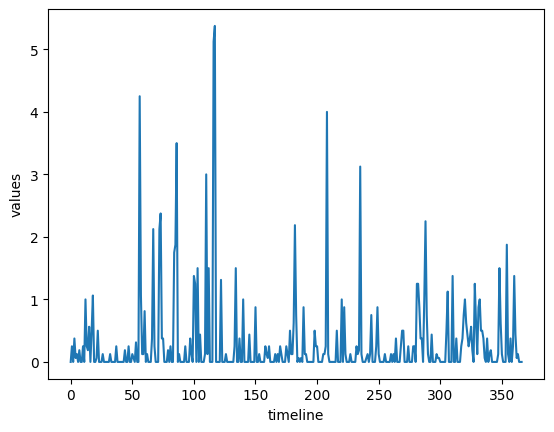

In [9]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(ts)
sns.lineplot(x='timeline', y='values', data=df)